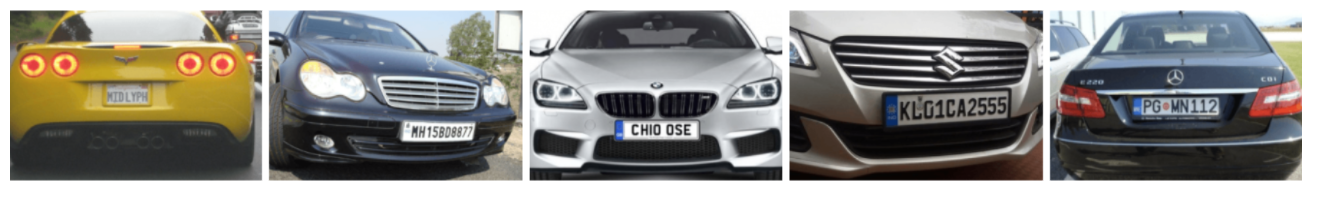

This dataset contains 433 images with bounding box annotations of the car license plates within the image. Our goal here is to train a convolutional neural network capable of locating licenses plate on new images. 

## Preparation of the data

Import libraries

In [18]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.7.0-py3-none-any.whl (2.4 kB)
  Using 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
mysql-connector-python 8.0.32 requires protobuf<=3.20.3,>=3.11.0, but you have protobuf 4.22.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-a

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

We display the files in Kaggle repertoire :

In [2]:
import os
for dirname, _, filenames in os.walk('../Kaggle/kaggle/input/car-plate-detection/annotations/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Kaggle/kaggle/input/car-plate-detection/annotations/Cars0.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars1.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars10.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars100.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars101.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars102.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars103.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars104.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars105.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars106.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars107.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars108.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars109.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars11.xml
../Kaggle/kaggle/input/car-plate-detection/annotations/Cars110.xml
.

We create the variable X containing all the images of cars by resizing them to 200 * 200.



In [3]:
IMAGE_SIZE = 200

In [4]:
img_dir = "../Kaggle/kaggle/input/car-plate-detection/images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort() #We sort the images in alphabetical order to match them to the xml files containing the annotations of the bounding boxes
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))
    

We create the variable y containing all the bounding boxe annotations (label). 
Before that, we will have to resize the annotations so that it fits the new size of the images (200*200). We create a function resizeannotation for that. 

In [5]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]
        

In [6]:
path = '../Kaggle/kaggle/input/car-plate-detection/annotations/'
text_files = ['../Kaggle/kaggle/input/car-plate-detection/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

In [7]:
resizeannotation("../Kaggle/kaggle/input/car-plate-detection/annotations/Cars147.xml")

[168, 126, 90, 93]

In [8]:
y[0]

[167, 129, 90, 93]

We check X et y shape

In [9]:
np.array(X).shape

(433, 200, 200, 3)

In [10]:
np.array(y).shape

(433, 4)

And we display the first eighteen image of the dataset : 

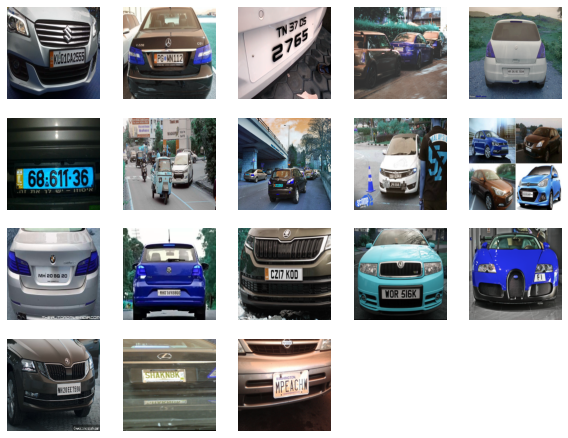

In [11]:
plt.figure(figsize=(10,20))
for i in range(0,18) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

We can draw the rectangle containing the license plate using the OpenCV library

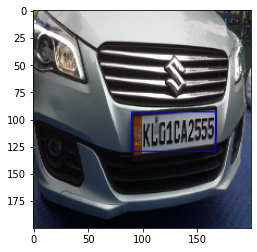

In [12]:
#Example with the first image of the dataset
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()


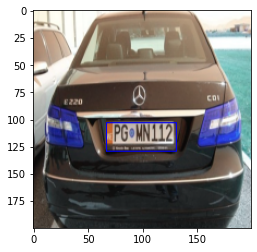

In [13]:
#Example with the second image of the dataset
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()


We prepare the data for the CNN :

In [14]:
#Transforming in array
X=np.array(X)
y=np.array(y)

In [15]:
#Renormalisation
X = X / 255
y = y / 255

We split our dataset in two : training set/testing set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

## Convolutionnal Neural Network

In [17]:

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [18]:
# Create the model
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

58889256/58889256 [==============================] - 92s 2us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                        

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [20]:
train = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
13/13 [==============================] - 19s 1s/step - loss: 0.0323 - accuracy: 0.4807 - val_loss: 0.0116 - val_accuracy: 0.5227
Epoch 2/50
13/13 [==============================] - 18s 1s/step - loss: 0.0101 - accuracy: 0.7172 - val_loss: 0.0086 - val_accuracy: 0.8409
Epoch 3/50
13/13 [==============================] - 18s 1s/step - loss: 0.0061 - accuracy: 0.8021 - val_loss: 0.0060 - val_accuracy: 0.8409
Epoch 4/50
13/13 [==============================] - 18s 1s/step - loss: 0.0036 - accuracy: 0.8098 - val_loss: 0.0056 - val_accuracy: 0.6364
Epoch 5/50
13/13 [==============================] - 18s 1s/step - loss: 0.0028 - accuracy: 0.7969 - val_loss: 0.0056 - val_accuracy: 0.8409
Epoch 6/50
13/13 [==============================] - 18s 1s/step - loss: 0.0020 - accuracy: 0.8715 - val_loss: 0.0051 - val_accuracy: 0.8636
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.0013 - accuracy: 0.8792 - val_loss: 0.0043 - val_accuracy: 0.8864
Epoch 8/50
13/13 [==

In [21]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 86.36%


In [22]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

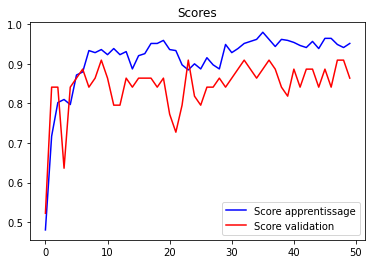

In [23]:
plot_scores(train)

## DETECTION 

In [24]:
 y_cnn = model.predict(X_test)

2/2 [==============================] - 2s 488ms/step


In [25]:
y_cnn.shape

(44, 4)

We can see how our model localize license plates on our testing set :

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

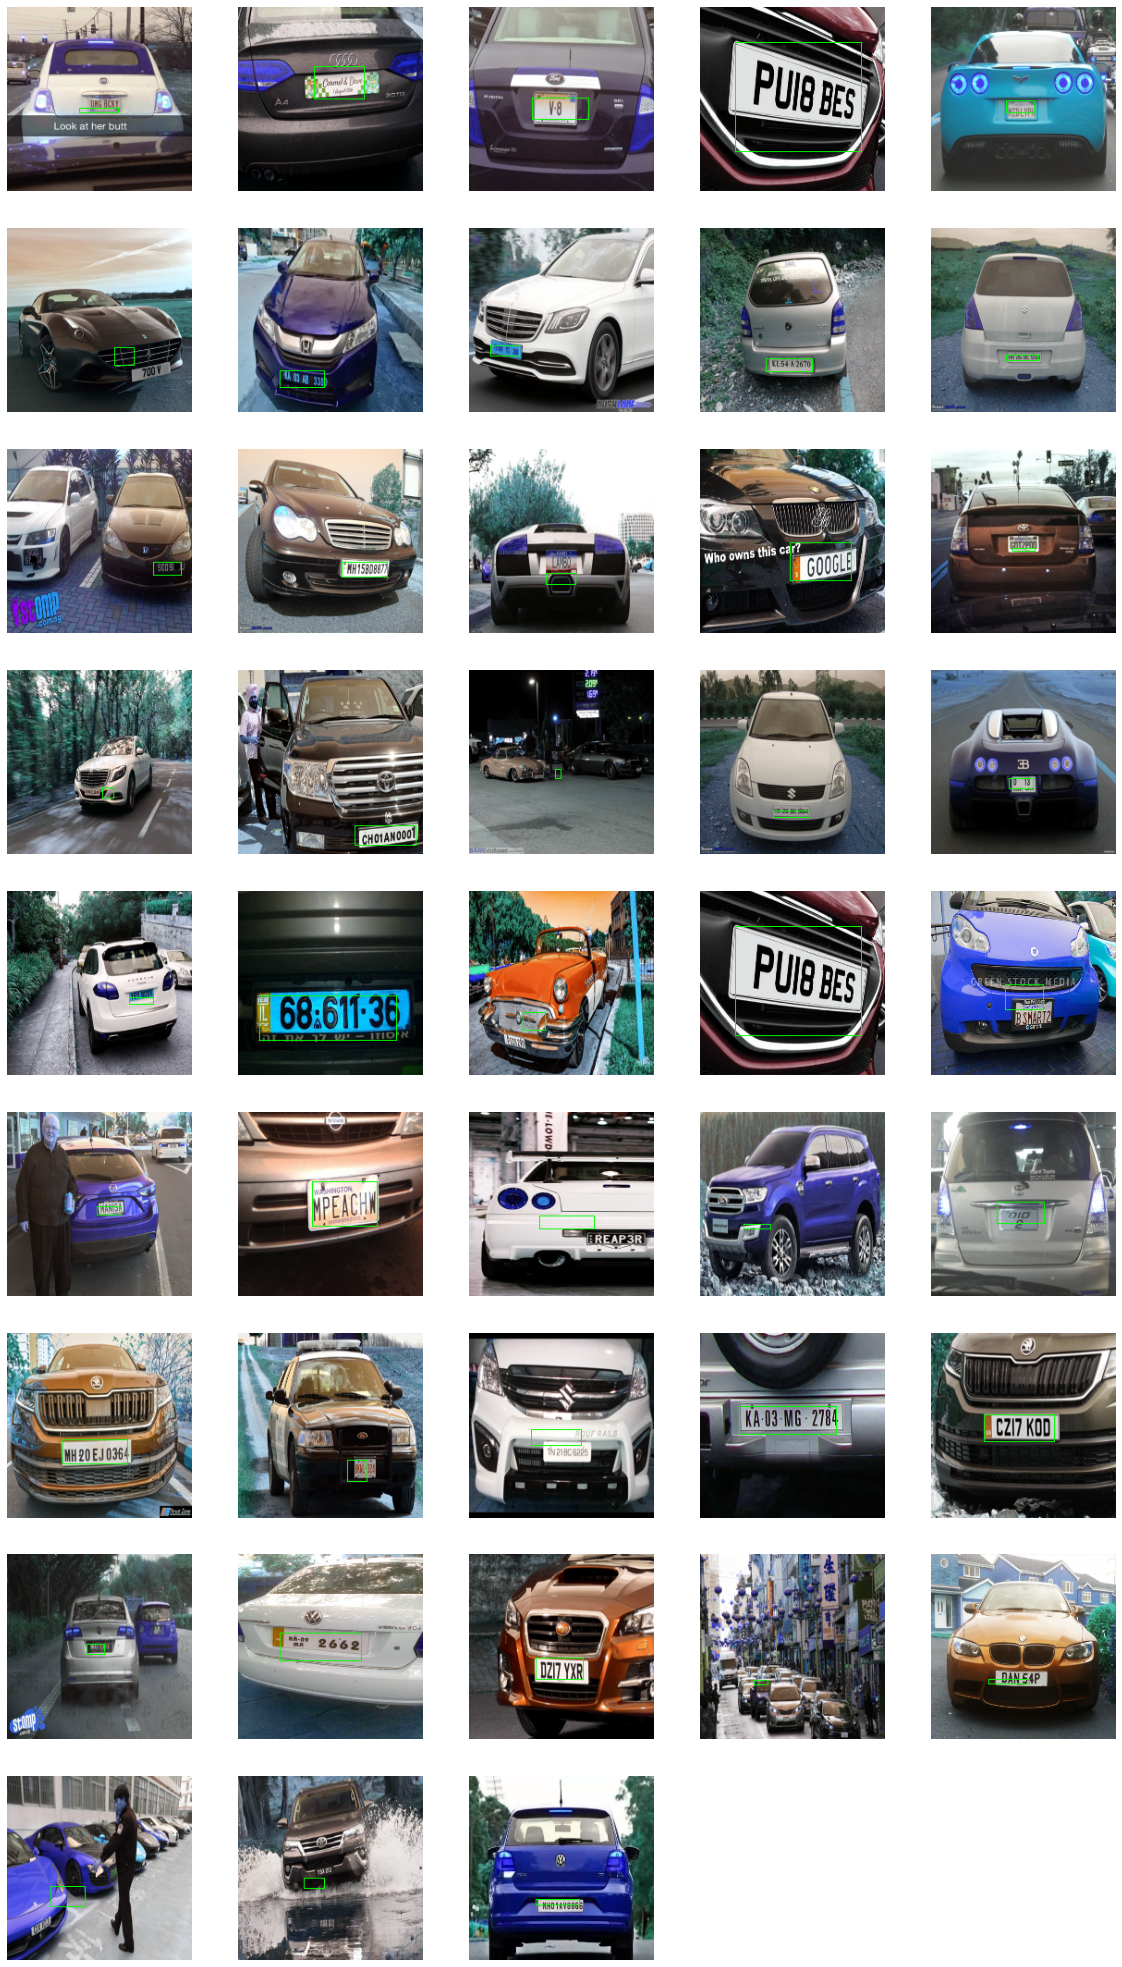

In [27]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)

